# Distance plots

This notebook calculate distance measures and provides visual analytics for them, e.g., PCA, hierarchical clustering and dendrograms, 3D plots.


## Imports

In [1]:
import pandas as pd
import numpy as np

import pprint
import random

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.gridspec as gridspec

from mpl_toolkits import mplot3d

pp = pprint.PrettyPrinter(indent = 2)
sns.set()

## Load data

In [2]:
embeddings_data = {}

In [3]:
embeddings_data["Code fragments embeddings (CSP and ED)"] = pd.read_csv("./content/df_csv_ed.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (CSP and ED)"]['label'].replace("CSV", "CSP", inplace=True)
embeddings_data["Code fragments embeddings (CSP and ED)"]


,label,modified,emb
0,singleton,1,"[-1.09523344039917, 0.706666886806488, 0.41208..."
1,singleton,1,"[-1.6358188390731812, 0.145565927028656, 0.827..."
2,singleton,1,"[-1.0289480686187744, 0.5274043083190918, 0.56..."
3,singleton,1,"[-0.8462713360786438, 1.1986424922943115, -0.4..."
4,singleton,1,"[-0.37643763422966003, 0.8491093516349792, -0...."
...,...,...,...
59,CSP,6,"[-0.13400031626224518, 0.8639693856239319, -0...."
60,CSP,6,"[-0.48211869597435, 0.5825670957565308, -1.381..."
61,CSP,6,"[-0.5789053440093994, 1.7349956035614014, -1.0..."
62,CSP,6,"[-0.5789053440093994, 1.7349956035614014, -1.0..."


In [4]:
embeddings_data["Code fragments embeddings (ED)"] = pd.read_csv("./content/df_onlyed.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (ED)"]

,label,modified,emb
0,singleton,1,"[-1.09523344039917, 0.706666886806488, 0.41208..."
1,singleton,1,"[-1.6358188390731812, 0.145565927028656, 0.827..."
2,singleton,1,"[-1.0289480686187744, 0.5274043083190918, 0.56..."
3,singleton,1,"[-0.8462713360786438, 1.1986424922943115, -0.4..."
4,singleton,1,"[-0.37643763422966003, 0.8491093516349792, -0...."
5,singleton,1,"[-0.709216296672821, 1.5197139978408813, -1.06..."
6,singleton,1,"[0.08267484605312347, 0.8816262483596802, 0.02..."
7,singleton,1,"[-1.1603374481201172, 0.7830381989479065, -0.0..."
8,singleton,1,"[-0.694542407989502, 0.3324301242828369, -0.12..."
9,singleton,1,"[-0.016722097992897034, 0.5674526691436768, -0..."


In [5]:
embeddings_data["Code fragments embeddings (CSP)"] = pd.read_csv("./content/df_onlycsv.csv", sep=",", index_col=0)
embeddings_data["Code fragments embeddings (CSP)"]['label'].replace("CSV", "CSP", inplace=True)
embeddings_data["Code fragments embeddings (CSP)"]

,label,modified,emb
0,singleton,1,"[-1.09523344039917, 0.706666886806488, 0.41208..."
1,singleton,1,"[-1.6358188390731812, 0.145565927028656, 0.827..."
2,singleton,1,"[-1.0289480686187744, 0.5274043083190918, 0.56..."
3,singleton,1,"[-0.8462713360786438, 1.1986424922943115, -0.4..."
4,singleton,1,"[-0.37643763422966003, 0.8491093516349792, -0...."
5,singleton,1,"[-0.709216296672821, 1.5197139978408813, -1.06..."
6,singleton,1,"[0.08267484605312347, 0.8816262483596802, 0.02..."
7,singleton,1,"[-1.1603374481201172, 0.7830381989479065, -0.0..."
8,singleton,1,"[-0.694542407989502, 0.3324301242828369, -0.12..."
9,singleton,1,"[-0.016722097992897034, 0.5674526691436768, -0..."


## 2D Visualization based on t-SNE

0 Code fragments embeddings (CSP and ED)
1 Code fragments embeddings (ED)
2 Code fragments embeddings (CSP)


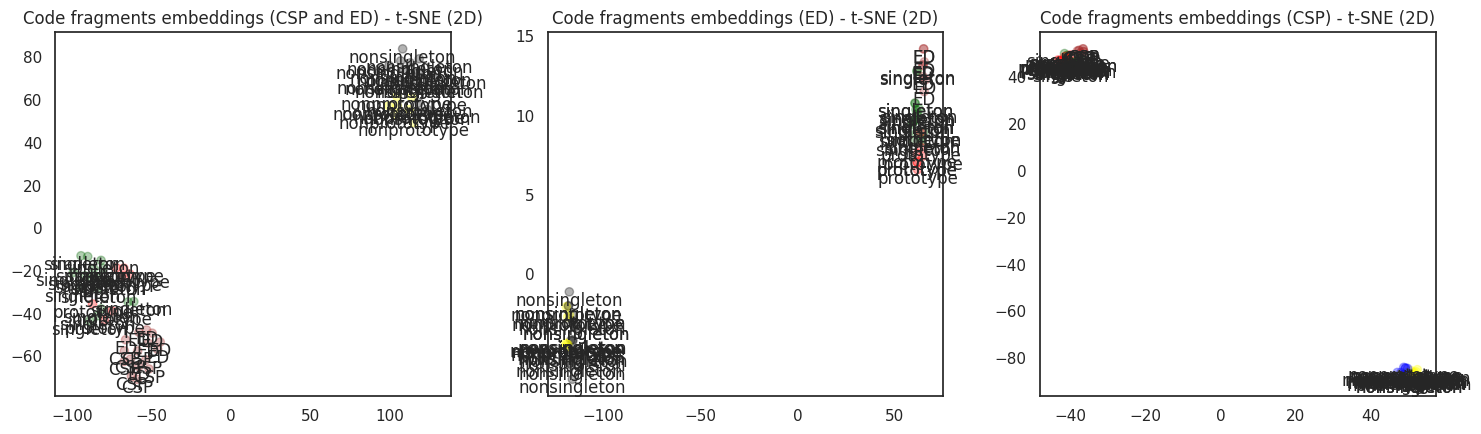

In [6]:
random.seed(343435)

fig = plt.figure(constrained_layout=True, figsize=(15,4.5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")


for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]
    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

    # Create a t-SNE model and transform the data
    tsne = TSNE(n_components=2, 
                perplexity=15, 
                random_state=42, 
                init='random', 
                learning_rate=200)

    vis_dims = tsne.fit_transform(matrix)

    colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
    x = [x for x,y in vis_dims]
    y = [y for x,y in vis_dims]

    color_indices = df.modified.values

    colormap = matplotlib.colors.ListedColormap(colors)

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)


    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
    for score in [0,1]:
        color = colors[score]
    ax.set_title(f"{model} - t-SNE (2D)")

    # zip joins x and y coordinates in pairs
    iIndex = 0
    for x,y in vis_dims:

        label = df.iloc[iIndex].label
        iIndex +=1

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./tsne-csv_ed_both.pdf")
plt.show()
plt.close()


## 2D Visualization based on PCA

0 Code fragments embeddings (CSP and ED)
(64, 2)
1 Code fragments embeddings (ED)
(56, 2)
2 Code fragments embeddings (CSP)
(56, 2)


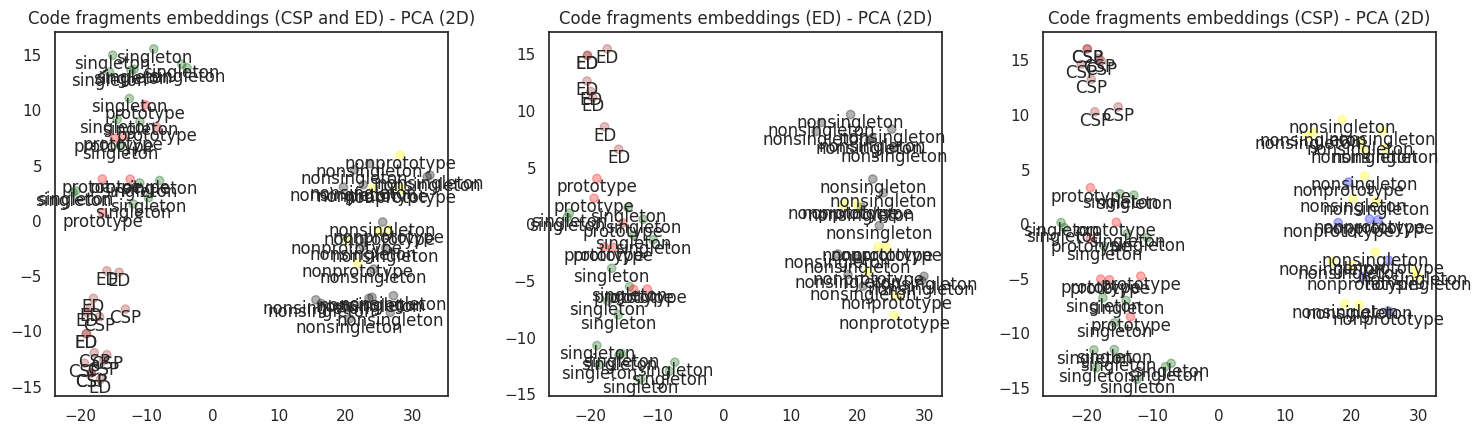

In [7]:
random.seed(343435)

fig = plt.figure(constrained_layout=True, figsize=(15,4.5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")

for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]
    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


    # Create a PCA model and transform the data
    pcaComp = PCA(n_components=2,
              random_state=42)

    vis_dims = pcaComp.fit_transform(matrix)
    print(vis_dims.shape)

    colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
    x = [x for x,y in vis_dims]
    y = [y for x,y in vis_dims]

    color_indices = df.modified.values

    colormap = matplotlib.colors.ListedColormap(colors)

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)


    plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
    for score in [0,1]:
        color = colors[score]
    ax.set_title(f"{model} - PCA (2D)")

    # zip joins x and y coordinates in pairs
    iIndex = 0
    for x,y in vis_dims:

        label = df.label.tolist()[iIndex]
        #print(label)
        iIndex +=1

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,-10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./pca-ed_csv_all.pdf")
plt.show()
plt.close()


(64, 2)


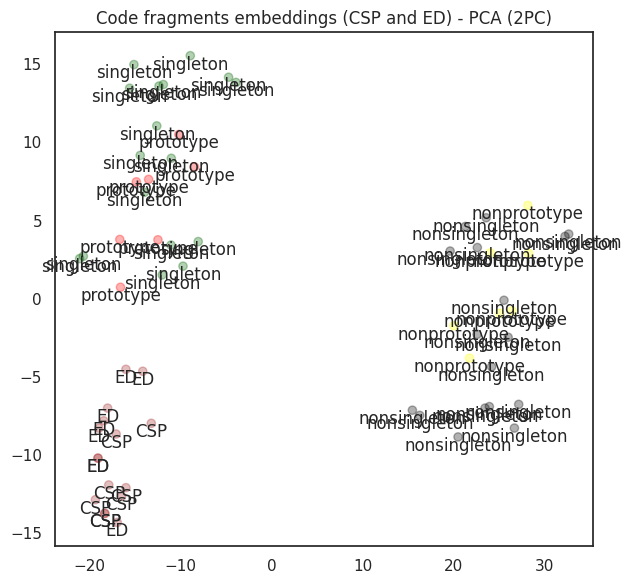

In [15]:
random.seed(343435)

fig = plt.figure(constrained_layout=True, figsize=(6.5,6))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]
# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


# Create a PCA model and transform the data
pcaComp = PCA(n_components=2,
          random_state=42)

vis_dims = pcaComp.fit_transform(matrix)
print(vis_dims.shape)

colors = ["red", "darkgreen", "black", "yellow", "blue", "brown"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

color_indices = df.modified.values

colormap = matplotlib.colors.ListedColormap(colors)

ax = fig.add_subplot(spec[0, 0])
ax.grid(False)


plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1]:
    color = colors[score]
ax.set_title(f"{model} - PCA (2PC)")

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y in vis_dims:

    label = df.label.tolist()[iIndex]
    #print(label)
    iIndex +=1

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,-10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.tight_layout()
plt.savefig("./pca-ed_csp_all.pdf")
plt.show()
plt.close()


## 3D visualization based on PCA

(64, 3)


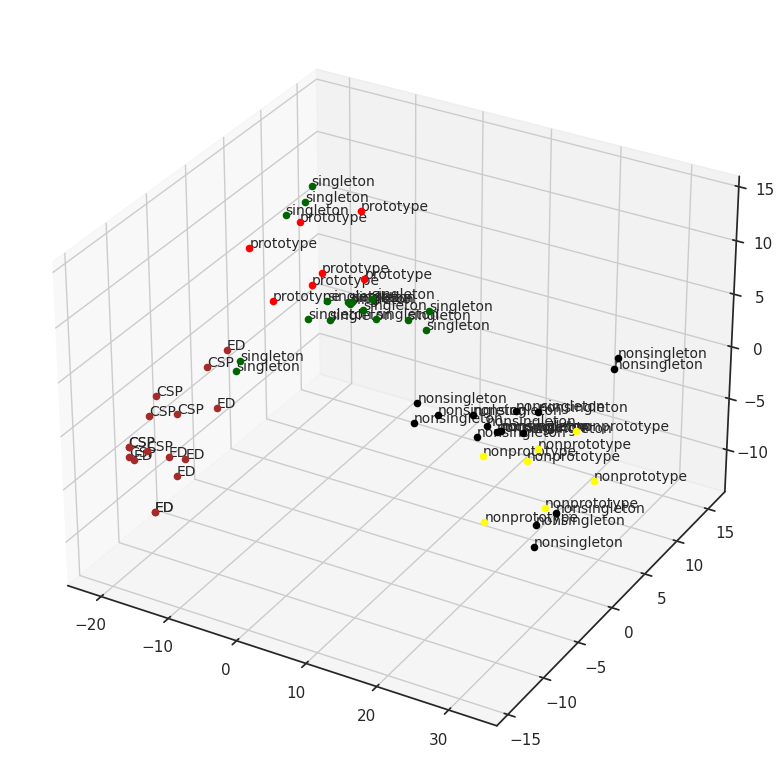

In [16]:
random.seed(343435)

fig = plt.figure(constrained_layout=True, figsize=(8,8))
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]
# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])


# Create a PCA model and transform the data
pcaComp = PCA(n_components=3,
          random_state=42)

vis_dims = pcaComp.fit_transform(matrix)
print(vis_dims.shape)

colors = ["red", "darkgreen", "black", "yellow", "blue", "brown", "brown"]
x = [x for x,y,z in vis_dims]
y = [y for x,y,z in vis_dims]
z = [y for x,y,z in vis_dims]

color_indices = df.modified.values

colormap = matplotlib.colors.ListedColormap(colors)

ax = plt.axes(projection='3d')

iIndex = 0
for x,y,z in vis_dims:

    label = df.label.tolist()[iIndex]
    modified = df.modified.tolist()[iIndex]

    #print(label)
    iIndex +=1
    ax.scatter(x, y, z, color=colors[modified])
    ax.text(x, y, z, label, zorder=1, size=10)

plt.tight_layout()
plt.savefig("./pca-ed_csp_all.pdf")
plt.show()
plt.close()

## Hierarchical clustering and dendrogram

0 Code fragments embeddings (CSP and ED)
['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP']
1 Code fragments embeddings (ED)
['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'single

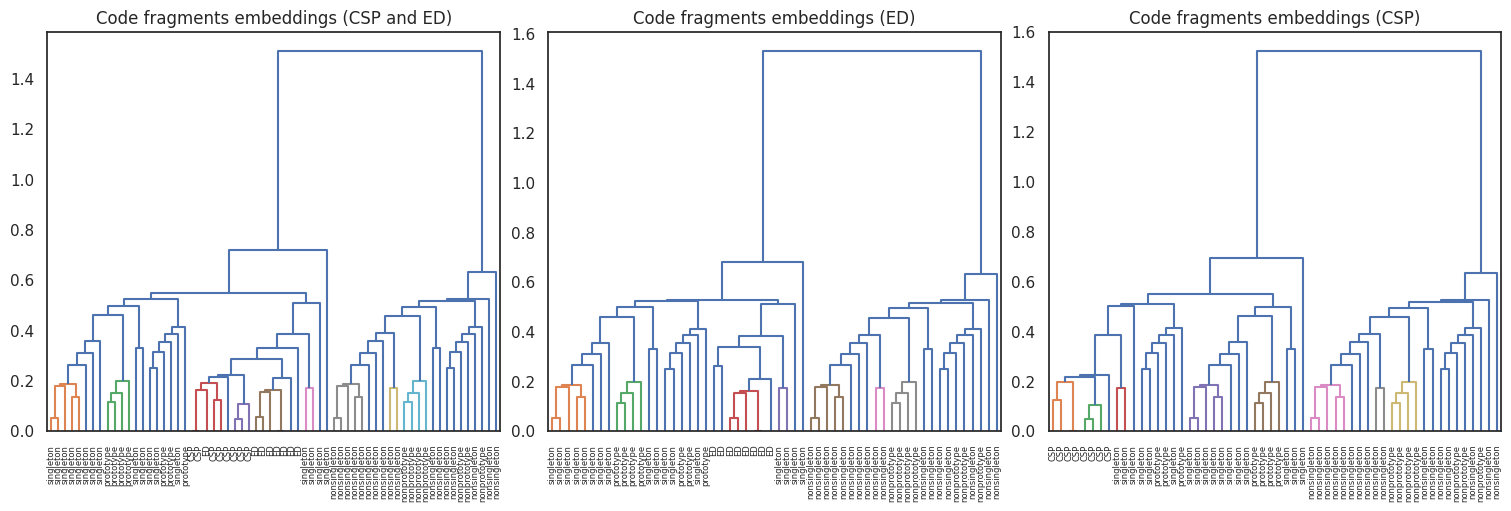

In [9]:
random.seed(343435)

color_thresholds = {
    "Code fragments embeddings (CSP and ED)": 0.2,
    "Code fragments embeddings (CSP)": 0.2,
    "Code fragments embeddings (ED)": 0.2,
}


fig = plt.figure(constrained_layout=True, figsize=(15,5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
sns.set_style("white")

for i, model in enumerate(embeddings_data.keys()):
    print(i, model)
    df = embeddings_data[model]
   
    # Convert to a list of lists of floats
    matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

    ax = fig.add_subplot(spec[0, i])
    ax.grid(False)

    X = matrix
    Z = linkage(X, metric='cosine', method="average")
    print(df.label.tolist())

    ax.set_title(f"{model}")
    #dendrogram(Z, labels=[ x if x != "Singleton" else "S" for x in df.ID.tolist()], 
    dendrogram(Z, labels= df.label.tolist(),
            distance_sort='descending',
                show_leaf_counts=True, leaf_rotation=90, color_threshold=color_thresholds[model])

plt.savefig("./dendrogram-csv-ed-all.pdf")
plt.show()
plt.close()


['singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'singleton', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'prototype', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonsingleton', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'nonprototype', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'ED', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP', 'CSP']


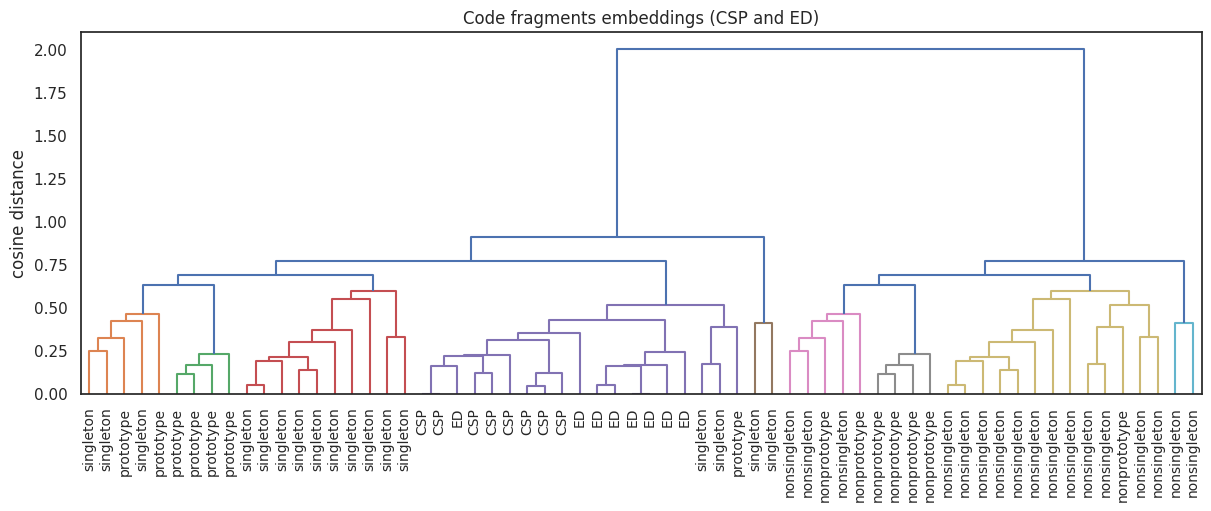

In [13]:
random.seed(343435)

color_thresholds = {
    "Code fragments embeddings (CSP and ED)": 0.6,
    "Code fragments embeddings (CSP)": 0.2,
    "Code fragments embeddings (ED)": 0.2,
}


fig = plt.figure(constrained_layout=True, figsize=(12,5))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
sns.set_style("white")

model = "Code fragments embeddings (CSP and ED)"


df = embeddings_data[model]

# Convert to a list of lists of floats
matrix = np.array([np.array(eval(x)) for x in df.emb.to_list()])

ax = fig.add_subplot(spec[0, 0])
ax.grid(False)

X = matrix
Z = linkage(X, metric='cosine', method="complete")
print(df.label.tolist())

ax.set_title(f"{model}")
#dendrogram(Z, labels=[ x if x != "Singleton" else "S" for x in df.ID.tolist()], 
dendrogram(Z, labels= df.label.tolist(),
        distance_sort='descending',
            show_leaf_counts=True, leaf_rotation=90, color_threshold=color_thresholds[model],
            leaf_font_size=10)
ax.set_ylabel("cosine distance")

plt.savefig("./dendrogram-csp-ed-all.pdf")
plt.show()
plt.close()
